### Install and Import Dependencies

In [22]:
# pip install torch torchvision torchaudio
# pip install opencv-python

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
import cv2

In [24]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt comet_ml 

import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-212-g9974d51f Python-3.10.11 torch-2.0.1 CPU


Setup complete ✅ (8 CPUs, 8.0 GB RAM, 188.1/228.3 GB disk)


### Load Data from RoboFlow

In [25]:
# !pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="sCy30oqL31968Yo7Zrpy")
project = rf.workspace("college-k2ite").project("detect-people-ulppw")
dataset = project.version(1).download("yolov5-obb")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Detect-People-1 in yolov5-obb:: 100%|██████████| 29/29 [00:00<00:00, 6860.78it/s]


## Train

In [26]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --epochs 100 --data /Users/kushalbanda/4-1/Artificial_Intelligence_in_Industry/Assignments/Assignment-2/yolov5/Detect-People-1/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/Users/kushalbanda/4-1/Artificial_Intelligence_in_Industry/Assignments/Assignment-2/yolov5/Detect-People-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-212-g9974d51 Python-3.10.11 torch-2.0.1 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0,

# Detect

In [27]:
!python detect.py --weights yolov5s.pt --img 320 --conf 0.25 --source /Users/kushalbanda/4-1/Artificial_Intelligence_in_Industry/Assignments/Assignment-2/Detect-People-1/test/images

detect: weights=['yolov5s.pt'], source=/Users/kushalbanda/4-1/Artificial_Intelligence_in_Industry/Assignments/Assignment-2/Detect-People-1/test/images, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-212-g9974d51 Python-3.10.11 torch-2.0.1 CPU

Fusing layers... 
[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/3 /Users/kushalbanda/4-1/Artificial_Intelligence_in_Industry/Assignments/Assignment-2/Detect-People-1/test/images/1_png.rf.eaa18b7966de2988fb6f94cbfee6ecb5.jpg: 320x320 1 person, 189.5ms
image 2/3 /Users/kushalbanda/4-1/Artificial

In [28]:
!python detect.py --weights yolov5s.pt --img 320 --conf 0.25 --source /Users/kushalbanda/4-1/Artificial_Intelligence_in_Industry/Assignments/Assignment-2/Data/Train

detect: weights=['yolov5s.pt'], source=/Users/kushalbanda/4-1/Artificial_Intelligence_in_Industry/Assignments/Assignment-2/Data/Train, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-212-g9974d51 Python-3.10.11 torch-2.0.1 CPU

Fusing layers... 
[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/8 /Users/kushalbanda/4-1/Artificial_Intelligence_in_Industry/Assignments/Assignment-2/Data/Train/05-12-21-happy-people.jpg: 224x320 1 person, 121.8ms
image 2/8 /Users/kushalbanda/4-1/Artificial_Intelligence_in_Industry/Assignments/Assignment-2/Dat

In [29]:
!python detect.py --weights yolov5s.pt --img 320 --conf 0.25 --source /Users/kushalbanda/4-1/Artificial_Intelligence_in_Industry/Assignments/Assignment-2/Data/Test

detect: weights=['yolov5s.pt'], source=/Users/kushalbanda/4-1/Artificial_Intelligence_in_Industry/Assignments/Assignment-2/Data/Test, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-212-g9974d51 Python-3.10.11 torch-2.0.1 CPU

Fusing layers... 
[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/5 /Users/kushalbanda/4-1/Artificial_Intelligence_in_Industry/Assignments/Assignment-2/Data/Test/1.jpeg: 320x256 6 persons, 143.2ms
image 2/5 /Users/kushalbanda/4-1/Artificial_Intelligence_in_Industry/Assignments/Assignment-2/Data/Test/2..JPG: 224x3

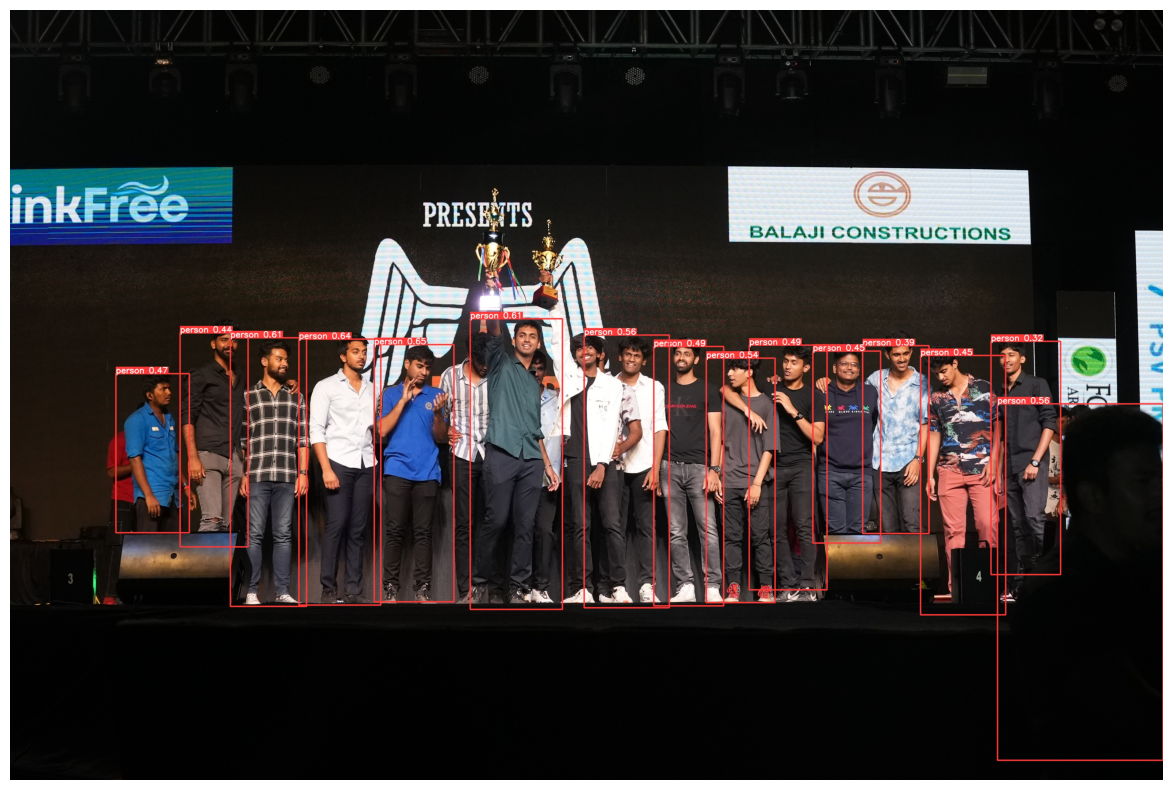

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
image_path = "/Users/kushalbanda/4-1/Artificial_Intelligence_in_Industry/Assignments/Assignment-2/yolov5/runs/detect/exp3/2..JPG"  # Replace with the actual image path
img = mpimg.imread(image_path)

# Plot the image
plt.figure(figsize = (20, 10))
plt.imshow(img)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()
